In [ ]:
#check version of tensor
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 137.3MB 59kB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
     |████████████████████████████████| 256kB 46.3MB/s 
     |████████████████████████████████| 921kB 43.1MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32852 sha256=7bc005406429256eb09bb9adbe6fe86368bc1f42e3350ef03a37d4bbecd6643e
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 0

In [ ]:
pip install -U ipython

     |████████████████████████████████| 788kB 2.6MB/s 
     |████████████████████████████████| 358kB 7.1MB/s 
ERROR: pyinquirer 1.0.3 has requirement prompt-toolkit==1.0.14, but you'll have prompt-toolkit 3.0.6 which is incompatible.
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.6 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.14
    Uninstalling prompt-toolkit-1.0.14:
      Successfully uninstalled prompt-toolkit-1.0.14
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [30]:
import tensorflow_datasets as tfds
import numpy as np
import time

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
#print(imdb.keys()) #dict_keys(['test', 'train', 'unsupervised'])

In [31]:
train_data, test_data = imdb['train'], imdb['test']

sentences = []
labels = []

# merge default train test for spliting it into 80/20 later
for s,l in train_data:
  sentences.append(str(s.numpy()))
  labels.append(l.numpy())
  
for s,l in test_data:
  sentences.append(str(s.numpy()))
  labels.append(l.numpy())

#convert str to np array
sentences_final = np.array(sentences) 
labels_final = np.array(labels)

In [32]:
print(sentences_final.shape) 
print(labels_final.shape)

(50000,)
(50000,)


In [ ]:
indices = np.arange(0,50000)
np.random.shuffle(indices)
sentences_final = sentences_final[indices]
labels_final = labels_final[indices]

In [ ]:
#print(np.unique(labels_final)) #binary so only 2 type 0,1
#print(len(np.unique(np.hstack(sentences_final)))) #49582 unique words in the reviews
# review_length = [len(i) for i in sentences_final] #get all the length of each review stack in an array [1146, 427, 1058, 715, 1853,...]
#print(max(review_length)) #max length of a review in index 13741
#print(min(review_length)) #min length of a review in index 35
# print(np.mean(review_length)) #avg review length 1371.00638
# print(round(np.std(review_length))) #standard deviation 995.0

In [ ]:
#split into training set. if want to change into different portion changes the test portion here. it's 80/20 now
training_size=50000
test_portion=.8
split = int(training_size * test_portion)

In [ ]:
training_sentences = sentences_final[0:split]
testing_sentences = sentences_final[split:]
training_labels = labels_final[0:split]
testing_labels = labels_final[split:]

In [33]:
import pandas as pd
df = pd.DataFrame(np.array([testing_sentences, testing_labels]).T, columns=['review', 'Label'])

In [34]:
df.to_csv('imdb.csv', index=False)

In [ ]:
vocab_size = 50000
embedding_dim = 18
max_length = 13741
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
#add padding into traing and testing features so all the review in same length
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
import json

with open('word_index.json', 'w') as f: 
  json.dump(word_index, f)

In [ ]:
#converting all the features and labels into np.array
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
print(len(testing_padded[3456]))

13741


In [ ]:
#reverse the word index:name pair
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
print(decode_review(training_padded[13741])) #padded review in str -> i see that c thomas howell has appeared in many movies since his heyday in the 80s as an accomplished young actor br br i bought ? ? ?
print(training_sentences[13741]) #raw review in str  -> I see that C. Thomas Howell has appeared in many movies since his heyday in the 80s as an accomplished young actor.<br /><br />I
print(training_labels[2]) #label for that review ->0
print(testing_sentences[1])
print(testing_labels[1])

b'after the failure of hellraiser iii hell on earth the chapter that served as a kind of 'death blow ' to the franchise another embarrassing cheapo cash in did not come as a surprise an abysmal attempt to explain every single mystery of pinhead and the puzzle box covering literally centuries of history in a film that runs under 90 minutes on display is sub par to wretched acting <OOV> par to wretched b movie special effects and a ludicrous and insulting attempt at dark humour while still attempting to keep the whole project completely serious i 'm wondering how many freaking directors did this thing have poor pinhead has so much screen time that every bit of mystery and menace that this iconic character possessed is completely lost after an hour of hearing long winded speeches and dramatic posturing we simply want to tell the guy to shut up mildly entertaining in spots especially in the first segment this mess begins to look and feel like a cheap ugly made for tv splatter flick after a

In [ ]:
#hidden layer1->global avg pooling
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 13741, 18)         900000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 18)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                456       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 900,481
Trainable params: 900,481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(32, kernel_initializer='lecun_normal', activation='selu'),
#     tf.keras.layers.AlphaDropout(0.01),
#     tf.keras.layers.Dense(16, kernel_initializer='lecun_normal', activation='selu'),
#     tf.keras.layers.AlphaDropout(0.01),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()

In [ ]:
num_epochs = 30
batch_size = 128
tick = time.time()
history = model.fit(training_padded, training_labels, batch_size=batch_size, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose = 1)
tock = time.time()
print('Took', time.strftime("%H:%M:%S", time.gmtime(tock - tick)))

Epoch 1/30
313/313 [==============================] - 54s 172ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6930 - val_accuracy: 0.5004
Epoch 2/30
313/313 [==============================] - 54s 171ms/step - loss: 0.6929 - accuracy: 0.5134 - val_loss: 0.6925 - val_accuracy: 0.5004
Epoch 3/30
313/313 [==============================] - 54s 171ms/step - loss: 0.6917 - accuracy: 0.5179 - val_loss: 0.6896 - val_accuracy: 0.5450
Epoch 4/30
313/313 [==============================] - 54s 171ms/step - loss: 0.6834 - accuracy: 0.5848 - val_loss: 0.6723 - val_accuracy: 0.7201
Epoch 5/30
313/313 [==============================] - 53s 170ms/step - loss: 0.6529 - accuracy: 0.6906 - val_loss: 0.6287 - val_accuracy: 0.7194
Epoch 6/30
313/313 [==============================] - 53s 170ms/step - loss: 0.5985 - accuracy: 0.7427 - val_loss: 0.5723 - val_accuracy: 0.7643
Epoch 7/30
313/313 [==============================] - 53s 169ms/step - loss: 0.5425 - accuracy: 0.7813 - val_loss: 0.5250 - val_ac

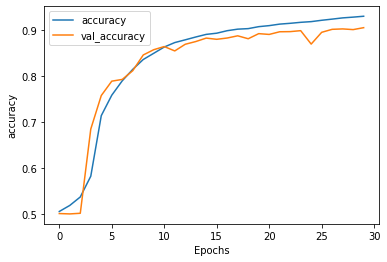

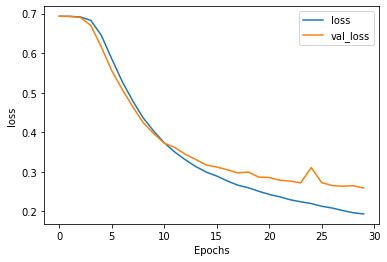

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [46]:
tick = time.time()
loss, acc = model.evaluate(testing_padded, testing_labels)
tock = time.time()
print('Loss:', loss, 'Accuracy:', acc, tock - tick, time.strftime("%H:%M:%S", time.gmtime(tock - tick)))

313/313 [==============================] - 6s 20ms/step - loss: 0.2645 - accuracy: 0.9019
Loss: 0.2645373046398163 Accuracy: 0.9018999934196472 6.381691932678223 00:00:06


In [ ]:
model.save('./model.h5')

In [ ]:
!tensorflowjs_converter \
--input_format=keras \
model.h5 \
modelName

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('./model.h5')

In [ ]:
loss, acc = loaded_model.evaluate(testing_padded, testing_labels)
print('Loss:', loss, 'Accuracy:', acc)

313/313 [==============================] - 7s 22ms/step - loss: 0.2645 - accuracy: 0.9019
Loss: 0.2645373046398163 Accuracy: 0.9018999934196472


In [ ]:
np.savetxt('data.csv', testing_padded, delimiter=',')

In [ ]:
np.savetxt('data_labels.csv', testing_labels, delimiter=' ')

In [ ]:
np.savez_compressed('test_data.npz', testing_padded)
np.savez_compressed('test_label.npz', testing_labels)

In [ ]:
split_data = np.char.split(sentences_final, sep =' ') 
all_words = np.sum(split_data)
unique_words = np.unique(all_words)
print(len(unique_words))

In [ ]:
words = set()
ignore = ["<br>", "</br>"]
for title, description in arr:
    words.update(set(word for word in title.strip().split() if word not in ignore))
    words.update(set(word for word in description.strip().split() if word not in ignore))

print(words)